<a href="https://colab.research.google.com/github/Sirsho1997/Telecom_Customer_Churn_Prediction/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE

import math

%matplotlib inline

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data
telcom = pd.read_excel('/content/drive/My Drive/TELECOM CHURN/CUST_DNA_History_DATAwithLabel .xlsx')

In [ ]:

#Looking at the data
telcom.head()

,DAY_KEY,MobileNumber,PROD_OFR_KEY,PROD_LN_CD,TOT_CALL_CNT_LAST_3MO,CMPLNT_CNT_LAST_3MO,DRPD_CALLS_CNT_LAST_3MO,HNGUP_CALLS_CNT_LAST_3MO,RLSD_CALLS_CNT_LAST_3MO,TOT_QUE_DRTN_LAST_3MO,TOT_HLD_DRTN_LAST_3MO,TOT_TALK_DRTN_LAST_3MO,RMRK_CNT_LAST_3MO,TOT_CALL_CNT_LAST_MO,CMPLNT_CNT_LAST_MO,DRPD_CALLS_CNT_LAST_MO,HNGUP_CALLS_CNT_LAST_MO,RLSD_CALLS_CNT_LAST_MO,TOT_QUE_DRTN_LAST_MO,TOT_HLD_DRTN_LAST_MO,TOT_TALK_DRTN_LAST_MO,RMRK_CNT_LAST_MO,VOI_NAT_AIRTIME_LFTM,VOI_NAT_AIRTIME_LAST_MO,VOI_NAT_AIRTIME_LAST_3MO,VOI_INTERNAT_AIRTIME_LFTM,VOI_INTERNAT_AIRTIME_LAST_MO,VOI_INTERNAT_AIRTIME_LAST_3MO,SMS_CNT_LFTM,SMS_CNT_LAST_MO,SMS_CNT_LAST_3MO,MMS_CNT_LFTM,MMS_CNT_LAST_MO,MMS_CNT_LAST_3MO,DWNLD_DATA_LFTM,DWNLD_DATA_LAST_MO,DWNLD_DATA_LAST_3MO,UPLD_DATA_LFTM,UPLD_DATA_LAST_MO,UPLD_DATA_LAST_3MO,OFFNET_CALLS_LFTM,OFFNET_CALLS_LAST_MO,OFFNET_CALLS_LAST_3MO,ONNET_CALLS_LFTM,ONNET_CALLS_LAST_MO,ONNET_CALLS_LAST_3MO,OFFNET_AIRTIME_LFTM,OFFNET_AIRTIME_LAST_MO,OFFNET_AIRTIME_LAST_3MO,ONNET_AIRTIME_LFTM,ONNET_AIRTIME_LAST_MO,ONNET_AIRTIME_LAST_3MO,TOT_RCHRG_AMT_LFTM,TOT_RCHRG_AMT_LAST_MO,TOT_RCHRG_AMT_LAST_3MO,LAST_RCHRG_AMT,MIN_RCHRG_AMT,MAX_RCHRG_AMT,TOT_RCHRG_CNT_LFTM,TOT_RCHRG_CNT_LAST_MO,TOT_RCHRG_CNT_LAST_3MO,TOT_EXP_AMT_EQVLT_VAL,TOT_UTILZD_EQVLT_VAL,TOT_CNTRBTN_LFTM,TOT_CNTRBTN_LAST_MO,TOT_DRTN_OF_USG,DAYS_BFR_FIRST_RCHRG,DAYS_BFR_FIRST_USE,AVG_DRTN_BTWN_RCHRG,TOT_DAYS_ON_USE,TOT_DAYS_ACTVTY,TOT_DAYS_OUTGOING_ACTVTY,LAST_OUTGOING_USG_DT_NBR,LAST_INCOMING_USG_DT_NBR,CHURN_IND,LOAD_DT
0,20160331,991,20150818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100000,0,100000,100000,0,0,2,0,2,0,2,100000,0,0,0.0,0,0,0,1.0,0.0,0,0,0,2016-07-10
1,20160331,992,20140810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,500000,0,500000,500000,0,0,1,0,1,0,1,500000,0,0,-42.0,0,0,0,1.0,0.0,0,0,0,2016-07-10
2,20160331,993,20140810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1.0,0.0,0,0,0,2016-07-10
3,20160331,994,20140810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1.0,0.0,0,0,0,2016-07-10
4,20160331,995,20140810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2.0,0.0,0,0,1,2016-07-10


## **Data Analysis**

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157747 entries, 0 to 157746
Data columns (total 76 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DAY_KEY                        157747 non-null  int64         
 1   MobileNumber                   157747 non-null  int64         
 2   PROD_OFR_KEY                   157747 non-null  int64         
 3   PROD_LN_CD                     157747 non-null  int64         
 4   TOT_CALL_CNT_LAST_3MO          157747 non-null  int64         
 5   CMPLNT_CNT_LAST_3MO            157747 non-null  int64         
 6   DRPD_CALLS_CNT_LAST_3MO        157747 non-null  int64         
 7   HNGUP_CALLS_CNT_LAST_3MO       157747 non-null  int64         
 8   RLSD_CALLS_CNT_LAST_3MO        157747 non-null  int64         
 9   TOT_QUE_DRTN_LAST_3MO          157747 non-null  int64         
 10  TOT_HLD_DRTN_LAST_3MO          157747 non-null  int64         
 11  

In [ ]:
#Data Overview
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())

Rows     :  157747
Columns  :  76

Features : 
 ['DAY_KEY', 'MobileNumber', 'PROD_OFR_KEY', 'PROD_LN_CD', 'TOT_CALL_CNT_LAST_3MO', 'CMPLNT_CNT_LAST_3MO', 'DRPD_CALLS_CNT_LAST_3MO', 'HNGUP_CALLS_CNT_LAST_3MO', 'RLSD_CALLS_CNT_LAST_3MO', 'TOT_QUE_DRTN_LAST_3MO', 'TOT_HLD_DRTN_LAST_3MO', 'TOT_TALK_DRTN_LAST_3MO', 'RMRK_CNT_LAST_3MO', 'TOT_CALL_CNT_LAST_MO', 'CMPLNT_CNT_LAST_MO', 'DRPD_CALLS_CNT_LAST_MO', 'HNGUP_CALLS_CNT_LAST_MO', 'RLSD_CALLS_CNT_LAST_MO', 'TOT_QUE_DRTN_LAST_MO', 'TOT_HLD_DRTN_LAST_MO', 'TOT_TALK_DRTN_LAST_MO', 'RMRK_CNT_LAST_MO', 'VOI_NAT_AIRTIME_LFTM', 'VOI_NAT_AIRTIME_LAST_MO', 'VOI_NAT_AIRTIME_LAST_3MO', 'VOI_INTERNAT_AIRTIME_LFTM', 'VOI_INTERNAT_AIRTIME_LAST_MO', 'VOI_INTERNAT_AIRTIME_LAST_3MO', 'SMS_CNT_LFTM', 'SMS_CNT_LAST_MO', 'SMS_CNT_LAST_3MO', 'MMS_CNT_LFTM', 'MMS_CNT_LAST_MO', 'MMS_CNT_LAST_3MO', 'DWNLD_DATA_LFTM', 'DWNLD_DATA_LAST_MO', 'DWNLD_DATA_LAST_3MO', 'UPLD_DATA_LFTM', 'UPLD_DATA_LAST_MO', 'UPLD_DATA_LAST_3MO', 'OFFNET_CALLS_LFTM', 'OFFNET_CALLS_LAST_M

In [ ]:
#Finding the number of unique values for each feature
telcom.nunique()

DAY_KEY                          1
MobileNumber                157747
PROD_OFR_KEY                    15
PROD_LN_CD                       2
TOT_CALL_CNT_LAST_3MO         1747
                             ...  
TOT_DAYS_OUTGOING_ACTVTY        94
LAST_OUTGOING_USG_DT_NBR         1
LAST_INCOMING_USG_DT_NBR         1
CHURN_IND                        2
LOAD_DT                          1
Length: 76, dtype: int64

The analysis shows that there are several columns with unique values. The columns with only one unique values does not influence the prediction. For data analysis, these columns are not required and need to be dropped. 

In [ ]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
DAY_KEY,157747.0,2.016033e+07,0.000000,20160331.0,20160331.0,20160331.0,20160331.0,20160331.0
MobileNumber,157747.0,7.986400e+04,45537.780794,991.0,40427.5,79864.0,119300.5,158737.0
PROD_OFR_KEY,157747.0,2.014738e+07,205259.679110,2008.0,20140810.0,20150818.0,20150818.0,30150206.0
PROD_LN_CD,157747.0,1.000247e+00,0.015722,1.0,1.0,1.0,1.0,2.0
TOT_CALL_CNT_LAST_3MO,157747.0,1.540588e+02,215.278190,0.0,20.0,83.0,205.0,9783.0
...,...,...,...,...,...,...,...,...
TOT_DAYS_ACTVTY,154100.0,5.571844e+01,32.981506,1.0,24.0,63.0,89.0,93.0
TOT_DAYS_OUTGOING_ACTVTY,154100.0,3.543590e+01,28.506571,0.0,9.0,30.0,59.0,93.0
LAST_OUTGOING_USG_DT_NBR,157747.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
LAST_INCOMING_USG_DT_NBR,157747.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
telcom = telcom.drop(['LOAD_DT'], axis=1)

# **Remove the columns with unique values**



The describe() function shows that there are multiple columns where the rows have same value. Obviously, they won't play any role in determining whether a customer will churn or not.

So it is better to remove them.

In [ ]:
#Iterate through the columns and form a list of columns where mean = max = min and std = 0
cols_with_zero_values = []
count=0

for cols in telcom.columns:
  if telcom[cols].min() == telcom[cols].max() and telcom[cols].mean() == telcom[cols].max() and telcom[cols].std() == 0:
    cols_with_zero_values.append(cols)
    count=count+1
  
print("The number of columns with min = mean = max ",count)

The number of columns with min = mean = max  28


In [ ]:
telcom = telcom.drop(cols_with_zero_values, axis=1)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157747 entries, 0 to 157746
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MobileNumber                   157747 non-null  int64  
 1   PROD_OFR_KEY                   157747 non-null  int64  
 2   PROD_LN_CD                     157747 non-null  int64  
 3   TOT_CALL_CNT_LAST_3MO          157747 non-null  int64  
 4   TOT_TALK_DRTN_LAST_3MO         157747 non-null  int64  
 5   TOT_CALL_CNT_LAST_MO           157747 non-null  int64  
 6   TOT_TALK_DRTN_LAST_MO          157747 non-null  int64  
 7   VOI_NAT_AIRTIME_LFTM           157747 non-null  int64  
 8   VOI_NAT_AIRTIME_LAST_MO        157747 non-null  int64  
 9   VOI_NAT_AIRTIME_LAST_3MO       157747 non-null  int64  
 10  VOI_INTERNAT_AIRTIME_LFTM      157747 non-null  int64  
 11  VOI_INTERNAT_AIRTIME_LAST_MO   157747 non-null  int64  
 12  VOI_INTERNAT_AIRTIME_LAST_3MO 

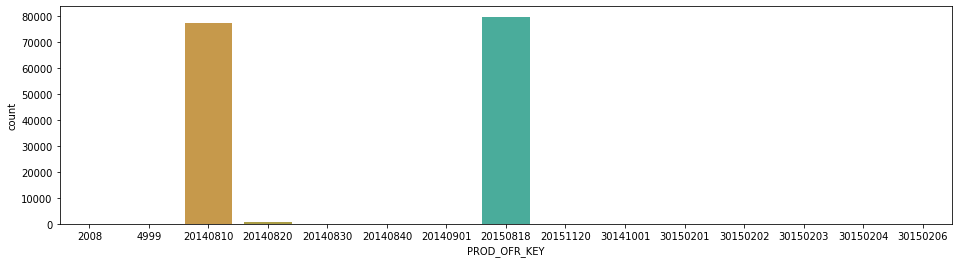

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=telcom['PROD_OFR_KEY'], data=telcom)

In [ ]:
telcom['PROD_OFR_KEY'].value_counts()

20150818    79656
20140810    77177
20140820      759
20151120       51
20140901       38
30150201       21
20140830       18
2008            6
30141001        6
30150202        5
20140840        3
30150203        3
30150206        2
30150204        1
4999            1
Name: PROD_OFR_KEY, dtype: int64

In [ ]:
# Applying binning

def transform_PROD_OFR_KEY(PROD_OFR_KEY):
    x = [20150818,20140810]
    if PROD_OFR_KEY not in x:
        return 0
    else:
        return PROD_OFR_KEY
    
telcom['PROD_OFR_KEY'] = telcom['PROD_OFR_KEY'].apply(transform_PROD_OFR_KEY)

In [ ]:
telcom['PROD_OFR_KEY'].value_counts()

20150818    79656
20140810    77177
0             914
Name: PROD_OFR_KEY, dtype: int64

Since '0' is just 0.58% , so it would be wise to discard the rows containing those values.

In [ ]:
telcom = telcom[telcom['PROD_OFR_KEY']!=0]

In [ ]:
telcom['PROD_OFR_KEY'].value_counts()

20150818    79656
20140810    77177
Name: PROD_OFR_KEY, dtype: int64

In [ ]:
#One hot encoding

PROD_OFR_KEY = pd.get_dummies(telcom['PROD_OFR_KEY'], drop_first=True)

In [ ]:
telcom = pd.concat([telcom, PROD_OFR_KEY], axis=1)

In [ ]:
telcom.drop('PROD_OFR_KEY', inplace=True, axis=1)

In [ ]:
telcom=telcom.rename(columns={20150818: "PROD_OFR_KEY"})

In [ ]:
telcom.head()

,MobileNumber,PROD_LN_CD,TOT_CALL_CNT_LAST_3MO,TOT_TALK_DRTN_LAST_3MO,TOT_CALL_CNT_LAST_MO,TOT_TALK_DRTN_LAST_MO,VOI_NAT_AIRTIME_LFTM,VOI_NAT_AIRTIME_LAST_MO,VOI_NAT_AIRTIME_LAST_3MO,VOI_INTERNAT_AIRTIME_LFTM,VOI_INTERNAT_AIRTIME_LAST_MO,VOI_INTERNAT_AIRTIME_LAST_3MO,SMS_CNT_LFTM,SMS_CNT_LAST_MO,SMS_CNT_LAST_3MO,MMS_CNT_LFTM,MMS_CNT_LAST_MO,MMS_CNT_LAST_3MO,OFFNET_CALLS_LFTM,OFFNET_CALLS_LAST_MO,OFFNET_CALLS_LAST_3MO,ONNET_CALLS_LFTM,ONNET_CALLS_LAST_MO,ONNET_CALLS_LAST_3MO,OFFNET_AIRTIME_LFTM,OFFNET_AIRTIME_LAST_MO,OFFNET_AIRTIME_LAST_3MO,ONNET_AIRTIME_LFTM,ONNET_AIRTIME_LAST_MO,ONNET_AIRTIME_LAST_3MO,TOT_RCHRG_AMT_LFTM,TOT_RCHRG_AMT_LAST_MO,TOT_RCHRG_AMT_LAST_3MO,LAST_RCHRG_AMT,TOT_RCHRG_CNT_LFTM,TOT_RCHRG_CNT_LAST_MO,TOT_RCHRG_CNT_LAST_3MO,TOT_EXP_AMT_EQVLT_VAL,TOT_UTILZD_EQVLT_VAL,TOT_CNTRBTN_LFTM,TOT_CNTRBTN_LAST_MO,TOT_DRTN_OF_USG,DAYS_BFR_FIRST_RCHRG,TOT_DAYS_ACTVTY,TOT_DAYS_OUTGOING_ACTVTY,CHURN_IND,PROD_OFR_KEY
0,991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100000,0,100000,100000,2,0,2,0,2,100000,0,0,0.0,1.0,0.0,0,1
1,992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,500000,0,500000,500000,1,0,1,0,1,500000,0,0,-42.0,1.0,0.0,0,0
2,993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,0.0,0,0
3,994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,0.0,0,0
4,995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,0.0,1,0


In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156833 entries, 0 to 157746
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MobileNumber                   156833 non-null  int64  
 1   PROD_LN_CD                     156833 non-null  int64  
 2   TOT_CALL_CNT_LAST_3MO          156833 non-null  int64  
 3   TOT_TALK_DRTN_LAST_3MO         156833 non-null  int64  
 4   TOT_CALL_CNT_LAST_MO           156833 non-null  int64  
 5   TOT_TALK_DRTN_LAST_MO          156833 non-null  int64  
 6   VOI_NAT_AIRTIME_LFTM           156833 non-null  int64  
 7   VOI_NAT_AIRTIME_LAST_MO        156833 non-null  int64  
 8   VOI_NAT_AIRTIME_LAST_3MO       156833 non-null  int64  
 9   VOI_INTERNAT_AIRTIME_LFTM      156833 non-null  int64  
 10  VOI_INTERNAT_AIRTIME_LAST_MO   156833 non-null  int64  
 11  VOI_INTERNAT_AIRTIME_LAST_3MO  156833 non-null  int64  
 12  SMS_CNT_LFTM                  

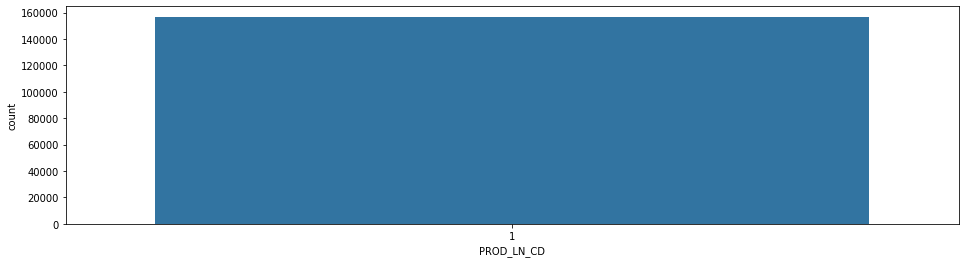

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=telcom['PROD_LN_CD'], data=telcom)

In [ ]:
telcom['PROD_LN_CD'].value_counts()

1    156833
Name: PROD_LN_CD, dtype: int64

As the values of feature 'PROD_LN_CD' contains only one unique value so removing it.

In [ ]:
telcom = telcom.drop(['PROD_LN_CD'], axis=1)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156833 entries, 0 to 157746
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MobileNumber                   156833 non-null  int64  
 1   TOT_CALL_CNT_LAST_3MO          156833 non-null  int64  
 2   TOT_TALK_DRTN_LAST_3MO         156833 non-null  int64  
 3   TOT_CALL_CNT_LAST_MO           156833 non-null  int64  
 4   TOT_TALK_DRTN_LAST_MO          156833 non-null  int64  
 5   VOI_NAT_AIRTIME_LFTM           156833 non-null  int64  
 6   VOI_NAT_AIRTIME_LAST_MO        156833 non-null  int64  
 7   VOI_NAT_AIRTIME_LAST_3MO       156833 non-null  int64  
 8   VOI_INTERNAT_AIRTIME_LFTM      156833 non-null  int64  
 9   VOI_INTERNAT_AIRTIME_LAST_MO   156833 non-null  int64  
 10  VOI_INTERNAT_AIRTIME_LAST_3MO  156833 non-null  int64  
 11  SMS_CNT_LFTM                   156833 non-null  int64  
 12  SMS_CNT_LAST_MO               

Out of 45 columns, there is one column as CHURN_IND. There is one column as mobile number. 

Mobile number is of data type object and value is different for each row. Mobile number column is not useful for training the model. But later mobile number is needed for predicting the churn with probability. 

Thus extracting the mobile number for later use.

In [ ]:
#Extracting the mobile numbers
mobileNumbers=telcom.filter(items=["MobileNumber"])

In [ ]:
#Dropping mobilenumber column from dataset
telcom = telcom.drop(['MobileNumber'], axis=1)

# **Missing data imputation**



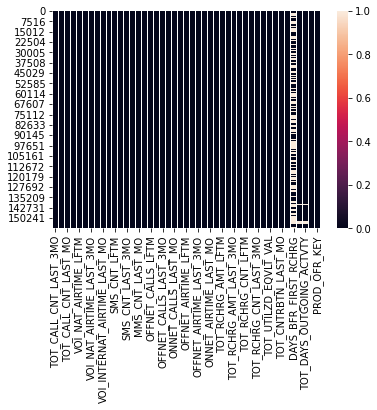

In [ ]:
# Identifying missing value

sns.heatmap(telcom.isnull())

In [ ]:
#Printing the count of missing values from each of the columns in the DataFrame

for col in telcom.columns:
    if telcom[col].isna().sum() > 0:
        print(col,'=>',telcom[col].isna().sum())

DAYS_BFR_FIRST_RCHRG => 87643
TOT_DAYS_ACTVTY => 3594
TOT_DAYS_OUTGOING_ACTVTY => 3594


In [ ]:
telcom[telcom['TOT_DAYS_ACTVTY'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TOT_TALK_DRTN_LAST_3MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TOT_CALL_CNT_LAST_MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TOT_TALK_DRTN_LAST_MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_NAT_AIRTIME_LFTM,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_NAT_AIRTIME_LAST_MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_NAT_AIRTIME_LAST_3MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_INTERNAT_AIRTIME_LFTM,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_INTERNAT_AIRTIME_LAST_MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
VOI_INTERNAT_AIRTIME_LAST_3MO,3594.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
telcom = telcom.dropna(axis=0, subset=['TOT_DAYS_ACTVTY'])

In [ ]:
telcom.TOT_DAYS_ACTVTY.isna().sum()

0

In [ ]:
#Printing the count of missing values from each of the columns in the DataFrame

for col in telcom.columns:
    if telcom[col].isna().sum() > 0:
        print(col,'=>',telcom[col].isna().sum())

DAYS_BFR_FIRST_RCHRG => 84049


In [ ]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,1.568019e+02,2.148254e+02,0.0,23.0,86.0,209.0,9783.0
TOT_TALK_DRTN_LAST_3MO,153239.0,1.910708e+04,3.365027e+04,0.0,2048.0,8333.0,22211.0,1303112.0
TOT_CALL_CNT_LAST_MO,153239.0,5.086897e+01,7.703010e+01,0.0,0.0,23.0,70.0,3149.0
TOT_TALK_DRTN_LAST_MO,153239.0,6.203003e+03,1.238683e+04,0.0,0.0,2022.0,7059.0,482621.0
VOI_NAT_AIRTIME_LFTM,153239.0,1.932751e+04,3.411922e+04,0.0,2059.0,8374.0,22435.5,1334209.0
VOI_NAT_AIRTIME_LAST_MO,153239.0,6.156417e+03,1.235651e+04,0.0,0.0,1972.0,6989.0,482621.0
VOI_NAT_AIRTIME_LAST_3MO,153239.0,1.896270e+04,3.357733e+04,0.0,1972.5,8180.0,21997.0,1303063.0
VOI_INTERNAT_AIRTIME_LFTM,153239.0,1.479526e+02,1.463879e+03,0.0,0.0,0.0,0.0,178293.0
VOI_INTERNAT_AIRTIME_LAST_MO,153239.0,4.658528e+01,5.899839e+02,0.0,0.0,0.0,0.0,69828.0
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,1.443816e+02,1.430272e+03,0.0,0.0,0.0,0.0,172937.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


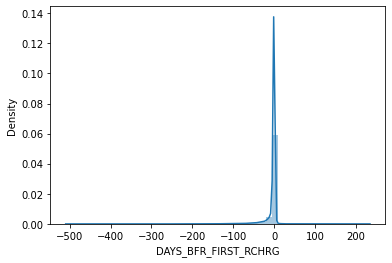

In [ ]:
sns.distplot(telcom['DAYS_BFR_FIRST_RCHRG'])

Random Imputation

In [ ]:
#Performing Random Imputation.
missingCols = ['DAYS_BFR_FIRST_RCHRG']
def randImputation(df, feature):

    numberMissing = df[feature].isnull().sum()
    observedValues = df.loc[df[feature].notnull(), feature]
    np.random.seed(1)
    df.loc[df[feature].isnull(), feature + '(R)'] = np.random.choice(observedValues, numberMissing, replace = True)
    return df


for feature in missingCols:
    telcom[feature + '(R)'] = telcom[feature]
    telcom= randImputation(telcom, feature)

Regression Imputation

In [ ]:
deter_data = pd.DataFrame(columns = ["(D)" + name for name in missingCols])

for feature in missingCols:
        
    deter_data["(D)" + feature] = telcom[feature + "(R)"]
    parameters = list(set(telcom.columns) - set(missingCols) - {feature + '(R)'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = telcom[parameters], y = telcom[feature + '(R)'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[telcom[feature].isnull(), "(D)" + feature] = model.predict(telcom[parameters])[telcom[feature].isnull()]

In [ ]:
deter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
(D)DAYS_BFR_FIRST_RCHRG,153239.0,-4.899988,13.882719,-503.0,-5.892444,-3.786681,0.0,228.0


In [ ]:
telcom=pd.concat([telcom, deter_data], axis = 1)

In [ ]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,1.568019e+02,2.148254e+02,0.0,23.000000,86.000000,209.0,9783.0
TOT_TALK_DRTN_LAST_3MO,153239.0,1.910708e+04,3.365027e+04,0.0,2048.000000,8333.000000,22211.0,1303112.0
TOT_CALL_CNT_LAST_MO,153239.0,5.086897e+01,7.703010e+01,0.0,0.000000,23.000000,70.0,3149.0
TOT_TALK_DRTN_LAST_MO,153239.0,6.203003e+03,1.238683e+04,0.0,0.000000,2022.000000,7059.0,482621.0
VOI_NAT_AIRTIME_LFTM,153239.0,1.932751e+04,3.411922e+04,0.0,2059.000000,8374.000000,22435.5,1334209.0
VOI_NAT_AIRTIME_LAST_MO,153239.0,6.156417e+03,1.235651e+04,0.0,0.000000,1972.000000,6989.0,482621.0
VOI_NAT_AIRTIME_LAST_3MO,153239.0,1.896270e+04,3.357733e+04,0.0,1972.500000,8180.000000,21997.0,1303063.0
VOI_INTERNAT_AIRTIME_LFTM,153239.0,1.479526e+02,1.463879e+03,0.0,0.000000,0.000000,0.0,178293.0
VOI_INTERNAT_AIRTIME_LAST_MO,153239.0,4.658528e+01,5.899839e+02,0.0,0.000000,0.000000,0.0,69828.0
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,1.443816e+02,1.430272e+03,0.0,0.000000,0.000000,0.0,172937.0


In [ ]:
telcom=telcom.drop(['DAYS_BFR_FIRST_RCHRG','DAYS_BFR_FIRST_RCHRG(R)'], axis=1)

In [ ]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,1.568019e+02,2.148254e+02,0.0,23.000000,86.000000,209.0,9783.0
TOT_TALK_DRTN_LAST_3MO,153239.0,1.910708e+04,3.365027e+04,0.0,2048.000000,8333.000000,22211.0,1303112.0
TOT_CALL_CNT_LAST_MO,153239.0,5.086897e+01,7.703010e+01,0.0,0.000000,23.000000,70.0,3149.0
TOT_TALK_DRTN_LAST_MO,153239.0,6.203003e+03,1.238683e+04,0.0,0.000000,2022.000000,7059.0,482621.0
VOI_NAT_AIRTIME_LFTM,153239.0,1.932751e+04,3.411922e+04,0.0,2059.000000,8374.000000,22435.5,1334209.0
VOI_NAT_AIRTIME_LAST_MO,153239.0,6.156417e+03,1.235651e+04,0.0,0.000000,1972.000000,6989.0,482621.0
VOI_NAT_AIRTIME_LAST_3MO,153239.0,1.896270e+04,3.357733e+04,0.0,1972.500000,8180.000000,21997.0,1303063.0
VOI_INTERNAT_AIRTIME_LFTM,153239.0,1.479526e+02,1.463879e+03,0.0,0.000000,0.000000,0.0,178293.0
VOI_INTERNAT_AIRTIME_LAST_MO,153239.0,4.658528e+01,5.899839e+02,0.0,0.000000,0.000000,0.0,69828.0
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,1.443816e+02,1.430272e+03,0.0,0.000000,0.000000,0.0,172937.0


In [ ]:
#Iterate through the columns and form a list of columns where mean = max = min and std = 0
cols_with_zero_values = []
count=0

for cols in telcom.columns:
  if telcom[cols].min() == telcom[cols].max() and telcom[cols].mean() == telcom[cols].max() and telcom[cols].std() == 0:
    cols_with_zero_values.append(cols)
    count=count+1
  
print("The number of columns with min = mean = max ",count)

The number of columns with min = mean = max  0


In [ ]:
cols_with_zero_values

[]

In [ ]:
telcom = telcom.drop(cols_with_zero_values, axis=1)

In [ ]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,1.568019e+02,2.148254e+02,0.0,23.000000,86.000000,209.0,9783.0
TOT_TALK_DRTN_LAST_3MO,153239.0,1.910708e+04,3.365027e+04,0.0,2048.000000,8333.000000,22211.0,1303112.0
TOT_CALL_CNT_LAST_MO,153239.0,5.086897e+01,7.703010e+01,0.0,0.000000,23.000000,70.0,3149.0
TOT_TALK_DRTN_LAST_MO,153239.0,6.203003e+03,1.238683e+04,0.0,0.000000,2022.000000,7059.0,482621.0
VOI_NAT_AIRTIME_LFTM,153239.0,1.932751e+04,3.411922e+04,0.0,2059.000000,8374.000000,22435.5,1334209.0
VOI_NAT_AIRTIME_LAST_MO,153239.0,6.156417e+03,1.235651e+04,0.0,0.000000,1972.000000,6989.0,482621.0
VOI_NAT_AIRTIME_LAST_3MO,153239.0,1.896270e+04,3.357733e+04,0.0,1972.500000,8180.000000,21997.0,1303063.0
VOI_INTERNAT_AIRTIME_LFTM,153239.0,1.479526e+02,1.463879e+03,0.0,0.000000,0.000000,0.0,178293.0
VOI_INTERNAT_AIRTIME_LAST_MO,153239.0,4.658528e+01,5.899839e+02,0.0,0.000000,0.000000,0.0,69828.0
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,1.443816e+02,1.430272e+03,0.0,0.000000,0.000000,0.0,172937.0


# **Checking for Correlation**

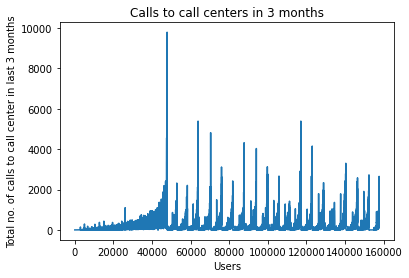

In [ ]:
#Plotting of variables TOT_CALL_CNT_LAST_3MO, TOT_CALL_CNT_LAST_MO with respect to users
yvar = telcom['TOT_CALL_CNT_LAST_3MO']
plt.ylabel('Total no. of calls to call center in last 3 months')
plt.xlabel ('Users')
plt.title("Calls to call centers in 3 months")
plt.plot(yvar)
plt.show()

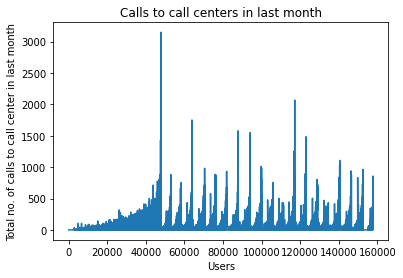

In [ ]:
y1var = telcom['TOT_CALL_CNT_LAST_MO']
plt.ylabel('Total no. of calls to call center in last month')
plt.xlabel ('Users')
plt.title("Calls to call centers in last month")
plt.plot(y1var)
plt.show()

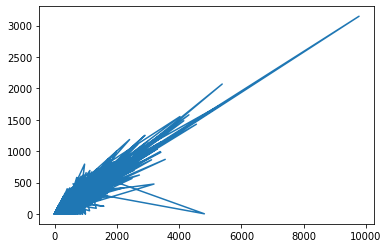

In [ ]:
plt.plot(yvar,y1var)
plt.show()

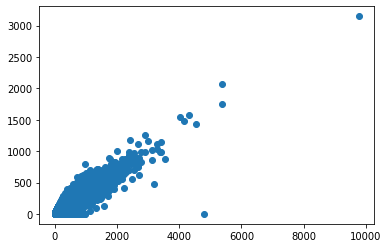

In [ ]:
plt.scatter(yvar, y1var)
plt.show()

The above analysis indicates that there is a strong positive correlation between the TOT_CALL_CNT_LAST_MO and TOT_CALL_CNT_LAST_3MO. Last 3 months data is linear aggregation of last one month and the data is contained in it. In view of this we can drop the column "Total number of calls made in last month. i.e Column titled'TOT_CALL_CNT_LAST_MO' 

In [ ]:
#Dropping column 'TOT_CALL_CNT_LAST_MO'
telcom.drop(['TOT_CALL_CNT_LAST_MO'], axis=1, inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   TOT_TALK_DRTN_LAST_MO          153239 non-null  int64  
 3   VOI_NAT_AIRTIME_LFTM           153239 non-null  int64  
 4   VOI_NAT_AIRTIME_LAST_MO        153239 non-null  int64  
 5   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 6   VOI_INTERNAT_AIRTIME_LFTM      153239 non-null  int64  
 7   VOI_INTERNAT_AIRTIME_LAST_MO   153239 non-null  int64  
 8   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 9   SMS_CNT_LFTM                   153239 non-null  int64  
 10  SMS_CNT_LAST_MO                153239 non-null  int64  
 11  SMS_CNT_LAST_3MO               153239 non-null  int64  
 12  MMS_CNT_LFTM                  

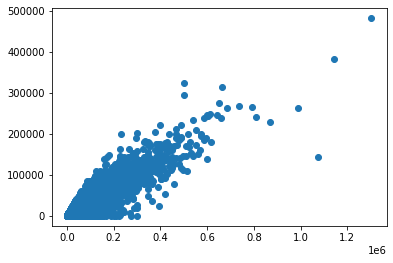

In [ ]:
yvar1 = telcom['TOT_TALK_DRTN_LAST_3MO']
y1var1= telcom['TOT_TALK_DRTN_LAST_MO']
plt.scatter(yvar1, y1var1)
plt.show()

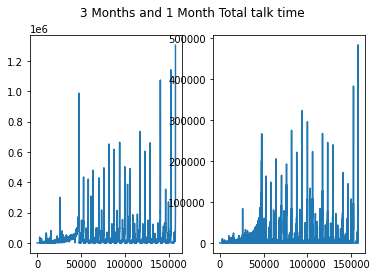

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('3 Months and 1 Month Total talk time')
ax1.plot(yvar1)
ax2.plot(y1var1)


In [ ]:
corr1=telcom['TOT_TALK_DRTN_LAST_MO'].corr(telcom['TOT_TALK_DRTN_LAST_3MO'])
print("Correlation between Total talk time last month Vs Total talk time last 3 months:", corr1)

Correlation between Total talk time last month Vs Total talk time last 3 months: 0.9213319974721964


The above analysis indicates that there is a strong positive correlation between the TOT_TALK_DRTN_LAST_MO and TOT_TALK_DRTN_LAST_3MO. Last 3 months data is linear aggregation of last one month and the data is contained in it. In view of this we can drop the column "Total number of calls made in last month. i.e Column titled'TOT_TALK_DRTN_LAST_MO' 

In [ ]:
#Dropping column 'TOT_TALK_DRTN_LAST_MO'
telcom.drop(['TOT_TALK_DRTN_LAST_MO'], axis=1,inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LFTM           153239 non-null  int64  
 3   VOI_NAT_AIRTIME_LAST_MO        153239 non-null  int64  
 4   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 5   VOI_INTERNAT_AIRTIME_LFTM      153239 non-null  int64  
 6   VOI_INTERNAT_AIRTIME_LAST_MO   153239 non-null  int64  
 7   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 8   SMS_CNT_LFTM                   153239 non-null  int64  
 9   SMS_CNT_LAST_MO                153239 non-null  int64  
 10  SMS_CNT_LAST_3MO               153239 non-null  int64  
 11  MMS_CNT_LFTM                   153239 non-null  int64  
 12  MMS_CNT_LAST_MO               

In [ ]:
#comment

In [ ]:
# Extracting the features association with National and International airtime for computing the correlation between them
voidf = telcom[['VOI_NAT_AIRTIME_LFTM','VOI_NAT_AIRTIME_LAST_MO','VOI_NAT_AIRTIME_LAST_3MO','VOI_INTERNAT_AIRTIME_LFTM','VOI_INTERNAT_AIRTIME_LAST_MO','VOI_INTERNAT_AIRTIME_LAST_3MO']]

In [ ]:
voidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   VOI_NAT_AIRTIME_LFTM           153239 non-null  int64
 1   VOI_NAT_AIRTIME_LAST_MO        153239 non-null  int64
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64
 3   VOI_INTERNAT_AIRTIME_LFTM      153239 non-null  int64
 4   VOI_INTERNAT_AIRTIME_LAST_MO   153239 non-null  int64
 5   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64
dtypes: int64(6)
memory usage: 8.2 MB


In [ ]:
#Computing the person correlation between the six features 
voidf.corr(method='pearson')

,VOI_NAT_AIRTIME_LFTM,VOI_NAT_AIRTIME_LAST_MO,VOI_NAT_AIRTIME_LAST_3MO,VOI_INTERNAT_AIRTIME_LFTM,VOI_INTERNAT_AIRTIME_LAST_MO,VOI_INTERNAT_AIRTIME_LAST_3MO
VOI_NAT_AIRTIME_LFTM,1.000000,0.919707,0.999684,0.029889,0.026300,0.029639
VOI_NAT_AIRTIME_LAST_MO,0.919707,1.000000,0.921361,0.027301,0.027589,0.027118
VOI_NAT_AIRTIME_LAST_3MO,0.999684,0.921361,1.000000,0.029987,0.026369,0.029751
VOI_INTERNAT_AIRTIME_LFTM,0.029889,0.027301,0.029987,1.000000,0.897276,0.998959
VOI_INTERNAT_AIRTIME_LAST_MO,0.026300,0.027589,0.026369,0.897276,1.000000,0.897024
VOI_INTERNAT_AIRTIME_LAST_3MO,0.029639,0.027118,0.029751,0.998959,0.897024,1.000000


The correlation analysis indicates there is a strong positive correlation between national voice air time (life time, last month and last 3 months) and between international voice air time (life time, last month and last 3 months). Thus eliminate 2 out of 3 features from both categoties

In [ ]:
# Deleting the temperary dataframe for freeing the memory
del voidf

Dropping national voice time life time, last month, International voice time life time, last month

In [ ]:
telcom.drop(['VOI_NAT_AIRTIME_LFTM','VOI_NAT_AIRTIME_LAST_MO', 'VOI_INTERNAT_AIRTIME_LFTM','VOI_INTERNAT_AIRTIME_LAST_MO'], axis=1, inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LFTM                   153239 non-null  int64  
 5   SMS_CNT_LAST_MO                153239 non-null  int64  
 6   SMS_CNT_LAST_3MO               153239 non-null  int64  
 7   MMS_CNT_LFTM                   153239 non-null  int64  
 8   MMS_CNT_LAST_MO                153239 non-null  int64  
 9   MMS_CNT_LAST_3MO               153239 non-null  int64  
 10  OFFNET_CALLS_LFTM              153239 non-null  int64  
 11  OFFNET_CALLS_LAST_MO           153239 non-null  int64  
 12  OFFNET_CALLS_LAST_3MO         

Analyzing the features of SMS and MMS data analysis. Extracting the six features into a temperory data frame for correlation analysis. 

In [ ]:
smmmsdf = telcom[['SMS_CNT_LFTM','SMS_CNT_LAST_MO','SMS_CNT_LAST_3MO','MMS_CNT_LFTM','MMS_CNT_LAST_MO','MMS_CNT_LAST_3MO']]

In [ ]:
#Analyzing the correlation between the SMS and MMS related six features 
smmmsdf.corr(method='pearson')

,SMS_CNT_LFTM,SMS_CNT_LAST_MO,SMS_CNT_LAST_3MO,MMS_CNT_LFTM,MMS_CNT_LAST_MO,MMS_CNT_LAST_3MO
SMS_CNT_LFTM,1.000000,0.765124,0.999893,0.086521,0.079520,0.086285
SMS_CNT_LAST_MO,0.765124,1.000000,0.764047,0.095496,0.097660,0.095842
SMS_CNT_LAST_3MO,0.999893,0.764047,1.000000,0.085473,0.078581,0.085251
MMS_CNT_LFTM,0.086521,0.095496,0.085473,1.000000,0.926889,0.998814
MMS_CNT_LAST_MO,0.079520,0.097660,0.078581,0.926889,1.000000,0.929025
MMS_CNT_LAST_3MO,0.086285,0.095842,0.085251,0.998814,0.929025,1.000000


The correlation analysis indicates there is a strong positive correlation between sms(life time, last month and last 3 months) and between mms (life time, last month and last 3 months). We can eliminate 2 out of 3 features from both categoties

In [ ]:
# Deleting the temperary dataframe for freeing the memory
del smmmsdf

Dropping sms life time, last month, mms life time, last month

In [ ]:
telcom.drop(['SMS_CNT_LFTM','SMS_CNT_LAST_MO', 'MMS_CNT_LFTM','MMS_CNT_LAST_MO'], axis=1, inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LFTM              153239 non-null  int64  
 7   OFFNET_CALLS_LAST_MO           153239 non-null  int64  
 8   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 9   ONNET_CALLS_LFTM               153239 non-null  int64  
 10  ONNET_CALLS_LAST_MO            153239 non-null  int64  
 11  ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 12  OFFNET_AIRTIME_LFTM           

Next step: Analyzing the data of offnet calls and on net calls
Extracting the six features into a temperory dataframe 'offnetdf'

In [ ]:

offonnetdf = telcom[['OFFNET_CALLS_LFTM','OFFNET_CALLS_LAST_MO','OFFNET_CALLS_LAST_3MO','ONNET_CALLS_LFTM','ONNET_CALLS_LAST_MO','ONNET_CALLS_LAST_3MO']]

In [ ]:
#Analyzing the correlation between the six features
offonnetdf.corr(method='pearson')

,OFFNET_CALLS_LFTM,OFFNET_CALLS_LAST_MO,OFFNET_CALLS_LAST_3MO,ONNET_CALLS_LFTM,ONNET_CALLS_LAST_MO,ONNET_CALLS_LAST_3MO
OFFNET_CALLS_LFTM,1.000000,0.921719,0.999653,0.523544,0.487680,0.523436
OFFNET_CALLS_LAST_MO,0.921719,1.000000,0.923335,0.481251,0.500006,0.481928
OFFNET_CALLS_LAST_3MO,0.999653,0.923335,1.000000,0.523145,0.488058,0.523245
ONNET_CALLS_LFTM,0.523544,0.481251,0.523145,1.000000,0.934933,0.999729
ONNET_CALLS_LAST_MO,0.487680,0.500006,0.488058,0.934933,1.000000,0.936340
ONNET_CALLS_LAST_3MO,0.523436,0.481928,0.523245,0.999729,0.936340,1.000000


The correlation analysis indicates there is a strong positive correlation between Offnet calls(life time, last month and last 3 months) and between onnet calls (life time, last month and last 3 months). We can eliminate 2 out of 3 features from both categoties. Dropping Offnet calls life time, last month, onnet calls life time, last month

In [ ]:
# Deleting the temperory dataframe for freeing the memory
del offonnetdf

In [ ]:
#Dropping Offnet calls life time, last month, onnet calls life time, last month
telcom.drop(['OFFNET_CALLS_LFTM','OFFNET_CALLS_LAST_MO', 'ONNET_CALLS_LFTM','ONNET_CALLS_LAST_MO'], axis=1, inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 7   ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 8   OFFNET_AIRTIME_LFTM            153239 non-null  int64  
 9   OFFNET_AIRTIME_LAST_MO         153239 non-null  int64  
 10  OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 11  ONNET_AIRTIME_LFTM             153239 non-null  int64  
 12  ONNET_AIRTIME_LAST_MO         

Next step: Analyzing the data of offnet airtime and onnet airtime. Extracting the six features into a temeperory dataframe

In [ ]:
offonnetatdf = telcom[['OFFNET_AIRTIME_LFTM','OFFNET_AIRTIME_LAST_MO','OFFNET_AIRTIME_LAST_3MO','ONNET_AIRTIME_LFTM','ONNET_AIRTIME_LAST_MO','ONNET_AIRTIME_LAST_3MO']]

In [ ]:
# #Analyzing the correlation between the six features
offonnetatdf.corr(method='pearson')

,OFFNET_AIRTIME_LFTM,OFFNET_AIRTIME_LAST_MO,OFFNET_AIRTIME_LAST_3MO,ONNET_AIRTIME_LFTM,ONNET_AIRTIME_LAST_MO,ONNET_AIRTIME_LAST_3MO
OFFNET_AIRTIME_LFTM,1.000000,0.881176,0.999478,0.330781,0.299267,0.330449
OFFNET_AIRTIME_LAST_MO,0.881176,1.000000,0.883276,0.290712,0.287428,0.290817
OFFNET_AIRTIME_LAST_3MO,0.999478,0.883276,1.000000,0.330128,0.299056,0.329900
ONNET_AIRTIME_LFTM,0.330781,0.290712,0.330128,1.000000,0.920270,0.999692
ONNET_AIRTIME_LAST_MO,0.299267,0.287428,0.299056,0.920270,1.000000,0.921955
ONNET_AIRTIME_LAST_3MO,0.330449,0.290817,0.329900,0.999692,0.921955,1.000000


The correlation analysis indicates there is a strong positive correlation between Offnet airtime (life time, last month and last 3 months) and between onnet airtime (life time, last month and last 3 months). We can eliminate 2 out of 3 features from both categoties. Dropping Offnet airtime life time, last month, onnet airtime life time, last month

In [ ]:
# Deleting the temperary dataframe for freeing the memory
del offonnetatdf

In [ ]:
#Dropping Offnet calls life time, last month, onnet calls life time, last month
telcom.drop(['OFFNET_AIRTIME_LFTM','OFFNET_AIRTIME_LAST_MO', 'ONNET_AIRTIME_LFTM','ONNET_AIRTIME_LAST_MO'], axis=1, inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 7   ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 8   OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 9   ONNET_AIRTIME_LAST_3MO         153239 non-null  int64  
 10  TOT_RCHRG_AMT_LFTM             153239 non-null  int64  
 11  TOT_RCHRG_AMT_LAST_MO          153239 non-null  int64  
 12  TOT_RCHRG_AMT_LAST_3MO        

Next step: Analyzing the data of total recharge amount. Copying the four recharge related features data into a temperory dataset

In [ ]:
rechamtdf = telcom[['TOT_RCHRG_AMT_LFTM','TOT_RCHRG_AMT_LAST_MO','TOT_RCHRG_AMT_LAST_3MO','LAST_RCHRG_AMT']]

In [ ]:
# #Analyzing the correlation between the four features
rechamtdf.corr(method='pearson')#correlation analysis

,TOT_RCHRG_AMT_LFTM,TOT_RCHRG_AMT_LAST_MO,TOT_RCHRG_AMT_LAST_3MO,LAST_RCHRG_AMT
TOT_RCHRG_AMT_LFTM,1.000000,0.865857,0.998976,0.326722
TOT_RCHRG_AMT_LAST_MO,0.865857,1.000000,0.868406,0.202021
TOT_RCHRG_AMT_LAST_3MO,0.998976,0.868406,1.000000,0.326669
LAST_RCHRG_AMT,0.326722,0.202021,0.326669,1.000000


The correlation analysis indicates there is a strong positive correlation between Total Recharge Amount  (life time, last month and last 3 months). We can eliminate 2 out of 3 features from Total Recharge amount. Dropping Total Recharge amount life time and Total Recharge amount Last Month

In [ ]:
# Deleting the temperory dataframe for freeing the memory
del rechamtdf

In [ ]:
#Dropping Total Recharge amount life time and Total Recharge amount Last Month
telcom.drop(['TOT_RCHRG_AMT_LFTM','TOT_RCHRG_AMT_LAST_MO'], axis=1,inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 7   ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 8   OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 9   ONNET_AIRTIME_LAST_3MO         153239 non-null  int64  
 10  TOT_RCHRG_AMT_LAST_3MO         153239 non-null  int64  
 11  LAST_RCHRG_AMT                 153239 non-null  int64  
 12  TOT_RCHRG_CNT_LFTM            

Next step: Analyzing data of Number of recharges made (lifetime, last month and last 3 months. Copying the recharge related 3 features into a temperory data frame

In [ ]:
tatrcgrgdf = telcom[['TOT_RCHRG_CNT_LFTM','TOT_RCHRG_CNT_LAST_MO','TOT_RCHRG_CNT_LAST_3MO']]

In [ ]:
# Analyzing the correlation between the three features
tatrcgrgdf.corr(method='pearson')#correlation analysis

,TOT_RCHRG_CNT_LFTM,TOT_RCHRG_CNT_LAST_MO,TOT_RCHRG_CNT_LAST_3MO
TOT_RCHRG_CNT_LFTM,1.000000,0.900339,0.999181
TOT_RCHRG_CNT_LAST_MO,0.900339,1.000000,0.902497
TOT_RCHRG_CNT_LAST_3MO,0.999181,0.902497,1.000000


The correlation analysis indicates there is a strong positive correlation between Number of recharges made (life time, last month and last 3 months). We can eliminate 2 out of 3 features from # of recharges made. Dropping the number of recharges life time and Total Recharge amount Last Month

In [ ]:
# Deleteing the temperory file to freeup the memory
del tatrcgrgdf

In [ ]:
#Dropping the number of recharges life time and Total Recharge amount Last Month
telcom.drop(['TOT_RCHRG_CNT_LFTM','TOT_RCHRG_CNT_LAST_MO'], axis=1,inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 7   ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 8   OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 9   ONNET_AIRTIME_LAST_3MO         153239 non-null  int64  
 10  TOT_RCHRG_AMT_LAST_3MO         153239 non-null  int64  
 11  LAST_RCHRG_AMT                 153239 non-null  int64  
 12  TOT_RCHRG_CNT_LAST_3MO        

Next step: Analyzing data of Sum of total payments and total recharges made (lifetime, last month).Copying the two related featyres intio a temperory dataframe

In [ ]:
totcontdf = telcom[['TOT_CNTRBTN_LFTM','TOT_CNTRBTN_LAST_MO']]

In [ ]:
#Analyzing the correlation between teh two features
totcontdf.corr(method='pearson')#correlation analysis

,TOT_CNTRBTN_LFTM,TOT_CNTRBTN_LAST_MO
TOT_CNTRBTN_LFTM,1.000000,0.865911
TOT_CNTRBTN_LAST_MO,0.865911,1.000000


The correlation analysis indicates there is a strong positive correlation between sum of total payments and total recharges (life time, last month). We can eliminate one factor out of 2 features  . Dropping the total recharges and payments life time  

In [ ]:
#Dropping the total recharges and payments life time 
telcom.drop(['TOT_CNTRBTN_LFTM'], axis=1,inplace=True)

In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_NAT_AIRTIME_LAST_3MO       153239 non-null  int64  
 3   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 4   SMS_CNT_LAST_3MO               153239 non-null  int64  
 5   MMS_CNT_LAST_3MO               153239 non-null  int64  
 6   OFFNET_CALLS_LAST_3MO          153239 non-null  int64  
 7   ONNET_CALLS_LAST_3MO           153239 non-null  int64  
 8   OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 9   ONNET_AIRTIME_LAST_3MO         153239 non-null  int64  
 10  TOT_RCHRG_AMT_LAST_3MO         153239 non-null  int64  
 11  LAST_RCHRG_AMT                 153239 non-null  int64  
 12  TOT_RCHRG_CNT_LAST_3MO        

Note: We have completed the correlation analysis between similar data related features and deleted highly correlated (>0.85) features to avoide duplication of features and to enable simplfication of the data. Now assessing the correlation between discemilar type of features.

In [ ]:
telcom.corr(method='pearson')#correlation analysis between the 22 features

,TOT_CALL_CNT_LAST_3MO,TOT_TALK_DRTN_LAST_3MO,VOI_NAT_AIRTIME_LAST_3MO,VOI_INTERNAT_AIRTIME_LAST_3MO,SMS_CNT_LAST_3MO,MMS_CNT_LAST_3MO,OFFNET_CALLS_LAST_3MO,ONNET_CALLS_LAST_3MO,OFFNET_AIRTIME_LAST_3MO,ONNET_AIRTIME_LAST_3MO,TOT_RCHRG_AMT_LAST_3MO,LAST_RCHRG_AMT,TOT_RCHRG_CNT_LAST_3MO,TOT_EXP_AMT_EQVLT_VAL,TOT_UTILZD_EQVLT_VAL,TOT_CNTRBTN_LAST_MO,TOT_DRTN_OF_USG,TOT_DAYS_ACTVTY,TOT_DAYS_OUTGOING_ACTVTY,CHURN_IND,PROD_OFR_KEY,(D)DAYS_BFR_FIRST_RCHRG
TOT_CALL_CNT_LAST_3MO,1.000000,0.764868,0.762984,0.083228,0.169600,0.263934,0.850462,0.892155,0.664000,0.614930,0.622518,0.178138,0.607571,-0.006433,0.011781,0.522432,0.649979,0.509532,0.740903,-0.187015,0.044705,0.039276
TOT_TALK_DRTN_LAST_3MO,0.764868,1.000000,0.999097,0.072191,0.214934,0.241568,0.581086,0.742547,0.694436,0.907181,0.678554,0.155660,0.662683,-0.005007,0.010835,0.578503,0.781055,0.383443,0.567023,-0.138941,0.076751,0.033940
VOI_NAT_AIRTIME_LAST_3MO,0.762984,0.999097,1.000000,0.029751,0.215541,0.241761,0.581051,0.741382,0.694942,0.908071,0.672301,0.153572,0.658645,-0.004980,0.010773,0.572322,0.780327,0.382303,0.565487,-0.138518,0.077774,0.033451
VOI_INTERNAT_AIRTIME_LAST_3MO,0.083228,0.072191,0.029751,1.000000,-0.003296,0.007778,0.030459,0.065223,0.023521,0.025359,0.181413,0.056948,0.128588,-0.000894,0.002021,0.174595,0.056932,0.046307,0.064962,-0.017022,-0.020103,0.013219
SMS_CNT_LAST_3MO,0.169600,0.214934,0.215541,-0.003296,1.000000,0.085251,0.108850,0.182724,0.116945,0.214856,0.215725,0.038287,0.209891,-0.001384,0.003231,0.185404,0.217385,0.109398,0.143480,-0.041709,0.033427,0.009044
MMS_CNT_LAST_3MO,0.263934,0.241568,0.241761,0.007778,0.085251,1.000000,0.213237,0.245334,0.196494,0.202946,0.285788,0.078617,0.272025,-0.002479,0.004882,0.239899,0.195576,0.204680,0.244482,-0.066239,0.052362,0.024928
OFFNET_CALLS_LAST_3MO,0.850462,0.581086,0.581051,0.030459,0.108850,0.213237,1.000000,0.523245,0.791141,0.302029,0.523108,0.199649,0.474144,-0.005758,0.009933,0.430091,0.487775,0.442140,0.633156,-0.162544,0.001473,0.028297
ONNET_CALLS_LAST_3MO,0.892155,0.742547,0.741382,0.065223,0.182724,0.245334,0.523245,1.000000,0.399615,0.740560,0.554030,0.115213,0.573157,-0.005458,0.010502,0.471821,0.635866,0.445973,0.657160,-0.163443,0.072592,0.038592
OFFNET_AIRTIME_LAST_3MO,0.664000,0.694436,0.694942,0.023521,0.116945,0.196494,0.791141,0.399615,1.000000,0.329900,0.561998,0.177552,0.516928,-0.004852,0.009398,0.470346,0.548985,0.351593,0.507692,-0.125521,0.022219,0.028347
ONNET_AIRTIME_LAST_3MO,0.614930,0.907181,0.908071,0.025359,0.214856,0.202946,0.302029,0.740560,0.329900,1.000000,0.555288,0.098200,0.563611,-0.003712,0.008669,0.477415,0.704688,0.297118,0.446689,-0.108742,0.089163,0.027404


The above analysis shows some of the features out of the 22 features are correlated high with other features. Need to drop one of teh features where the correlation is more than 0.85.

In [ ]:
#function to analyze the correlation between teh columns and drop columns over a certain correlation coefficient 
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

Copying the 22 features data set into a temperary variable "telcomtest"

In [ ]:
telcomtest = telcom.copy(deep=True)

In [ ]:
# Running the correlation function to assess and drop features more than 0.85 
correlation(telcomtest,0.85)

        TOT_CALL_CNT_LAST_3MO  ...  (D)DAYS_BFR_FIRST_RCHRG
0                           0  ...                 0.000000
1                           0  ...               -42.000000
2                           0  ...                -6.293862
3                           0  ...                -6.293862
4                           0  ...                -6.496547
...                       ...  ...                      ...
157742                   1674  ...                 0.000000
157743                    658  ...                -2.108023
157744                   1349  ...                 0.000000
157745                   1354  ...                -4.257773
157746                   1649  ...                -9.507969

[153239 rows x 17 columns]


In [ ]:
telcomtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153239 entries, 0 to 157746
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TOT_CALL_CNT_LAST_3MO          153239 non-null  int64  
 1   TOT_TALK_DRTN_LAST_3MO         153239 non-null  int64  
 2   VOI_INTERNAT_AIRTIME_LAST_3MO  153239 non-null  int64  
 3   SMS_CNT_LAST_3MO               153239 non-null  int64  
 4   MMS_CNT_LAST_3MO               153239 non-null  int64  
 5   OFFNET_AIRTIME_LAST_3MO        153239 non-null  int64  
 6   TOT_RCHRG_AMT_LAST_3MO         153239 non-null  int64  
 7   LAST_RCHRG_AMT                 153239 non-null  int64  
 8   TOT_RCHRG_CNT_LAST_3MO         153239 non-null  int64  
 9   TOT_EXP_AMT_EQVLT_VAL          153239 non-null  int64  
 10  TOT_UTILZD_EQVLT_VAL           153239 non-null  int64  
 11  TOT_DRTN_OF_USG                153239 non-null  int64  
 12  TOT_DAYS_ACTVTY               

# **Checking for Skewness in the Data Set**

In [ ]:
X=telcomtest
X=X.drop(['CHURN_IND'], axis=1)

In [ ]:
X

,TOT_CALL_CNT_LAST_3MO,TOT_TALK_DRTN_LAST_3MO,VOI_INTERNAT_AIRTIME_LAST_3MO,SMS_CNT_LAST_3MO,MMS_CNT_LAST_3MO,OFFNET_AIRTIME_LAST_3MO,TOT_RCHRG_AMT_LAST_3MO,LAST_RCHRG_AMT,TOT_RCHRG_CNT_LAST_3MO,TOT_EXP_AMT_EQVLT_VAL,TOT_UTILZD_EQVLT_VAL,TOT_DRTN_OF_USG,TOT_DAYS_ACTVTY,TOT_DAYS_OUTGOING_ACTVTY,PROD_OFR_KEY,(D)DAYS_BFR_FIRST_RCHRG
0,0,0,0,0,0,0,100000,100000,2,0,2,0,1.0,0.0,1,0.000000
1,0,0,0,0,0,0,500000,500000,1,0,1,0,1.0,0.0,0,-42.000000
2,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,-6.293862
3,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,-6.293862
4,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0,-6.496547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157742,1674,392418,0,421,14,33069,13000000,300000,74,0,76,128232,90.0,89.0,1,0.000000
157743,658,456479,0,469,8,201294,15600000,500000,77,0,77,226990,65.0,61.0,0,-2.108023
157744,1349,477389,0,35,0,17482,11450000,500000,46,0,46,363270,62.0,55.0,1,0.000000
157745,1354,572915,0,265,0,19931,16000000,300000,105,0,106,343517,93.0,93.0,1,-4.257773


In [ ]:
leftskew=[]
rightskew=[]
for cols in X.columns:
  skew = X[cols].skew()
  if skew > 0 and skew-1>0:
    rightskew.append(cols)    
  elif skew < 0 and skew+1>0:
    leftskew.append(cols)

**Left Skew**

The columns which are right skewed are transformed using square() function

In [ ]:
leftskew

['TOT_DAYS_ACTVTY', 'PROD_OFR_KEY']

In [ ]:
for cols in leftskew:
  X[cols]=X[cols].apply(lambda x: np.square(x))

**Right Skew**

The columns which are right skewed are transformed using sqrt() function

In [ ]:
rightskew

['TOT_CALL_CNT_LAST_3MO',
 'TOT_TALK_DRTN_LAST_3MO',
 'VOI_INTERNAT_AIRTIME_LAST_3MO',
 'SMS_CNT_LAST_3MO',
 'MMS_CNT_LAST_3MO',
 'OFFNET_AIRTIME_LAST_3MO',
 'TOT_RCHRG_AMT_LAST_3MO',
 'LAST_RCHRG_AMT',
 'TOT_RCHRG_CNT_LAST_3MO',
 'TOT_EXP_AMT_EQVLT_VAL',
 'TOT_DRTN_OF_USG']

In [ ]:
for cols in rightskew:
  X[cols]=X[cols].apply(lambda x: np.sqrt(x))

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,10.226503,7.226399,0.0,4.795832,9.273618,14.456832,98.909049
TOT_TALK_DRTN_LAST_3MO,153239.0,107.391295,87.030103,0.0,45.254834,91.285267,149.033553,1141.539312
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,2.670758,11.715354,0.0,0.000000,0.000000,0.000000,415.856947
SMS_CNT_LAST_3MO,153239.0,3.936867,6.310803,0.0,0.000000,2.000000,4.898979,280.260593
MMS_CNT_LAST_3MO,153239.0,0.270002,0.822695,0.0,0.000000,0.000000,0.000000,7.071068
OFFNET_AIRTIME_LAST_3MO,153239.0,69.052885,58.246427,0.0,26.888659,58.103356,96.772930,994.719558
TOT_RCHRG_AMT_LAST_3MO,153239.0,900.775254,702.233663,0.0,447.213595,774.596669,1264.911064,10004.998751
LAST_RCHRG_AMT,153239.0,339.221141,204.677447,0.0,316.227766,316.227766,316.227766,3162.277660
TOT_RCHRG_CNT_LAST_3MO,153239.0,2.404975,1.673814,0.0,1.414214,2.236068,3.316625,14.282857
TOT_EXP_AMT_EQVLT_VAL,153239.0,0.039492,3.449003,0.0,0.000000,0.000000,0.000000,614.206806


# **Performing Normalization**

In [ ]:
X=X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_CALL_CNT_LAST_3MO,153239.0,-1.497187e-14,0.073061,-0.103393,-0.054906,-0.009634,0.042770,0.896607
TOT_TALK_DRTN_LAST_3MO,153239.0,3.632396e-16,0.076239,-0.094076,-0.054432,-0.014109,0.036479,0.905924
VOI_INTERNAT_AIRTIME_LAST_3MO,153239.0,-3.709141e-16,0.028172,-0.006422,-0.006422,-0.006422,-0.006422,0.993578
SMS_CNT_LAST_3MO,153239.0,-1.557637e-15,0.022518,-0.014047,-0.014047,-0.006911,0.003433,0.985953
MMS_CNT_LAST_3MO,153239.0,-1.191813e-15,0.116347,-0.038184,-0.038184,-0.038184,-0.038184,0.961816
OFFNET_AIRTIME_LAST_3MO,153239.0,-1.041256e-15,0.058556,-0.069419,-0.042388,-0.011008,0.027867,0.930581
TOT_RCHRG_AMT_LAST_3MO,153239.0,1.240126e-14,0.070188,-0.090033,-0.045334,-0.012612,0.036395,0.909967
LAST_RCHRG_AMT,153239.0,6.059244e-14,0.064725,-0.107271,-0.007271,-0.007271,-0.007271,0.892729
TOT_RCHRG_CNT_LAST_3MO,153239.0,-2.847326e-14,0.117190,-0.168382,-0.069367,-0.011826,0.063828,0.831618
TOT_EXP_AMT_EQVLT_VAL,153239.0,1.484290e-17,0.005615,-0.000064,-0.000064,-0.000064,-0.000064,0.999936


In [ ]:
Y=telcom['CHURN_IND']

In [ ]:
Y

0         0
1         0
2         0
3         0
4         1
         ..
157742    0
157743    0
157744    0
157745    0
157746    0
Name: CHURN_IND, Length: 153239, dtype: int64

# **Handling Imbalanced Dataset**

In [ ]:
from collections import Counter
print(Counter(Y))

Counter({0: 131741, 1: 21498})


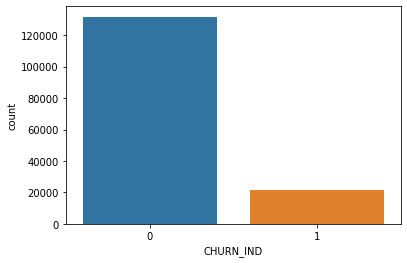

In [ ]:
ax = sns.countplot(x=Y, data=telcom)

In [ ]:
def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('****************************************************************************************')


In [ ]:


def predict_with_logisticRegression(X_train, y_train, X_test):
    """
    This method creates a model using Logistic Regression classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    model=LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train.ravel())
    lr_y_predict = model.predict(X_test)
    return lr_y_predict

def predict_with_knn(X_train, y_train, X_test):
    """
    This method creates a model using KNN classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    model=KNeighborsClassifier()
    model.fit(X_train, y_train.ravel())
    knn_y_predict = model.predict(X_test)
    return knn_y_predict



def predict_with_decisionTree(X_train, y_train, X_test):
    """
    This method creates a model using Decision Tree classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train.ravel())
    dt_y_predict = model.predict(X_test)
    return dt_y_predict

def predict_with_SVM(X_train, y_train, X_test):
    """
    This method creates a model using SVM classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    # model = svm.SVC(gamma='scale', kernel ='rbf', degree = 3) 
    model = LinearSVC(random_state=0, tol=1e-5)
    # RBF Kernel
    # Train the model using the training sets
    model.fit(X_train, y_train.ravel())
    #Predict the response for test dataset
    svm_y_pred = model.predict(X_test)
    return svm_y_pred

def predict_with_randomForest(X_train, y_train, X_test):
    """
    This method creates a model using Random forest classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    forest_y_predict = model.predict(X_test)
    return forest_y_predict  


In [ ]:
#Lood the data
df_preProcessed = telcom

#Split test and train data

X = df_preProcessed.drop('CHURN_IND',axis=1)
y = df_preProcessed['CHURN_IND'].values


In [ ]:
# splitting data set 70% train and 30%  test  ---- Stratifiled ????
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Smote - Read from net 
smote_on_data = math.floor((sum(y_train == 0))*0.6)  # 60 (Label-0)/40 (Labe-1) distribution
sm = SMOTE(sampling_strategy={1: smote_on_data}, random_state = 2)  # seed 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

#checking before after data shape for SMOTE 
print("Before Smote, counts of label '1': {} \n".format(sum(y_train == 1))) 
print("Before Smote, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Smote, counts of label '1': {} \n".format(sum(y_train_res == 1)))
print("After Smote, counts of label '0': {} \n".format(sum(y_train_res == 0)))

SKLearn_Model_Data = {}
Model_accuracy = {}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before Smote, counts of label '1': 15074 

Before Smote, counts of label '0': 92193 

After Smote, counts of label '1': 55315 

After Smote, counts of label '0': 92193 



In [ ]:
#Predict the model with logistic regression with pre-processed data without SMOTE
lr_y_predict = predict_with_logisticRegression(X_train, y_train, X_test)
lr_y_predict_smote = predict_with_logisticRegression(X_train_res, y_train_res, X_test)

#Evaluate random forest without SMOTE
getModelReport("Logistic Regression without SMOTE", y_test, lr_y_predict)

#Evaluate random forest with SMOTE
getModelReport("Logistic Regression with SMOTE", y_test, lr_y_predict_smote)



*************************************************************************************
FOR Logistic Regression without SMOTE:
ACCURACY: 0.86224223440355
F1 SCORE: 0.08469431998843764
CONFUSION MATRIX: 
[[39346   202]
 [ 6131   293]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     39548
           1       0.59      0.05      0.08      6424

    accuracy                           0.86     45972
   macro avg       0.73      0.52      0.51     45972
weighted avg       0.83      0.86      0.81     45972

****************************************************************************************


*************************************************************************************
FOR Logistic Regression with SMOTE:
ACCURACY: 0.8622204820325415
F1 SCORE: 0.27561756633119855
CONFUSION MATRIX: 
[[38433  1115]
 [ 5219  1205]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0  

In [ ]:
#Predict the model with logistic regression with pre-processed data without SMOTE
knn_y_predict = predict_with_knn(X_train, y_train, X_test)
knn_y_predict_smote = predict_with_knn(X_train_res, y_train_res, X_test)

#Evaluate KNN without SMOTE
getModelReport("KNN without SMOTE", y_test, knn_y_predict)

#Evaluate KNN with SMOTE
getModelReport("KNN with SMOTE", y_test, knn_y_predict_smote)



*************************************************************************************
FOR KNN without SMOTE:
ACCURACY: 0.895914904724615
F1 SCORE: 0.5776326242386796
CONFUSION MATRIX: 
[[37915  1633]
 [ 3152  3272]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     39548
           1       0.67      0.51      0.58      6424

    accuracy                           0.90     45972
   macro avg       0.80      0.73      0.76     45972
weighted avg       0.89      0.90      0.89     45972

****************************************************************************************


*************************************************************************************
FOR KNN with SMOTE:
ACCURACY: 0.8411641868963717
F1 SCORE: 0.5418496674614129
CONFUSION MATRIX: 
[[34352  5196]
 [ 2106  4318]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.87      0.90    

In [ ]:
#Predict the model with random forest with pre-processed data without SMOTE
forest_y_predict = predict_with_randomForest(X_train, y_train, X_test)
forest_y_predict_smote = predict_with_randomForest(X_train_res, y_train_res, X_test)

#Evaluate random forest without SMOTE
getModelReport("Random Forest without SMOTE", y_test, forest_y_predict)


#Evaluate random forest with SMOTE
getModelReport("Random Forest with SMOTE", y_test, forest_y_predict_smote)



*************************************************************************************
FOR Random Forest without SMOTE:
ACCURACY: 0.92958757504568
F1 SCORE: 0.7081943568015866
CONFUSION MATRIX: 
[[38807   741]
 [ 2496  3928]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39548
           1       0.84      0.61      0.71      6424

    accuracy                           0.93     45972
   macro avg       0.89      0.80      0.83     45972
weighted avg       0.93      0.93      0.92     45972

****************************************************************************************


*************************************************************************************
FOR Random Forest with SMOTE:
ACCURACY: 0.921038893239363
F1 SCORE: 0.7018235584031542
CONFUSION MATRIX: 
[[38070  1478]
 [ 2152  4272]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      

In [ ]:
#Predict the model with SVM with pre-processed data without SMOTE
svm_y_predict = predict_with_SVM(X_train, y_train, X_test)
svm_y_predict_smote = predict_with_SVM(X_train_res, y_train_res, X_test)

#Evaluate SVM without SMOTE
getModelReport("SVM without SMOTE", y_test, svm_y_predict)

#Evaluate SVM with SMOTE
getModelReport("SVM with SMOTE", y_test, svm_y_predict_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




*************************************************************************************
FOR SVM without SMOTE:
ACCURACY: 0.8896719742451927
F1 SCORE: 0.42389822807814626
CONFUSION MATRIX: 
[[39034   514]
 [ 4558  1866]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39548
           1       0.78      0.29      0.42      6424

    accuracy                           0.89     45972
   macro avg       0.84      0.64      0.68     45972
weighted avg       0.88      0.89      0.87     45972

****************************************************************************************


*************************************************************************************
FOR SVM with SMOTE:
ACCURACY: 0.3236100234925607
F1 SCORE: 0.2458710256348071
CONFUSION MATRIX: 
[[ 9808 29740]
 [ 1355  5069]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.25      0.39  

In [ ]:
#Predict the model with decision tree with pre-processed data without SMOTE
dt_y_predict = predict_with_decisionTree(X_train, y_train, X_test)
dt_y_predict_smote = predict_with_decisionTree(X_train_res, y_train_res, X_test)

#Evaluate decision tree without SMOTE
getModelReport("Decison Tree without SMOTE", y_test, dt_y_predict)


#Evaluate decision tree with SMOTE
getModelReport("Decison Tree with SMOTE", y_test, dt_y_predict_smote)



*************************************************************************************
FOR Decison Tree without SMOTE:
ACCURACY: 0.8958061428695728
F1 SCORE: 0.6351865955826352
CONFUSION MATRIX: 
[[37012  2536]
 [ 2254  4170]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     39548
           1       0.62      0.65      0.64      6424

    accuracy                           0.90     45972
   macro avg       0.78      0.79      0.79     45972
weighted avg       0.90      0.90      0.90     45972

****************************************************************************************


*************************************************************************************
FOR Decison Tree with SMOTE:
ACCURACY: 0.8839946054119899
F1 SCORE: 0.6229763167196889
CONFUSION MATRIX: 
[[36233  3315]
 [ 2018  4406]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95     